<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/03_Pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch computer vision

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #do we want the training datasets
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to tranform the data ?
    target_transform=None, # how do we want to transform the labels

)

test_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=False, #do we want the training datasets
    download=True,
    transform=ToTensor(), # how do we want to tranform the data ?
    target_transform=None, # how do we want to transform the labels

)

100%|██████████| 26421880/26421880 [00:02<00:00, 11880655.16it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 196566.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3722550.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22329138.56it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data)

60000

In [ ]:
image,label=train_data[0]


In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#chek the shape of our image
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

## 1.2 visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

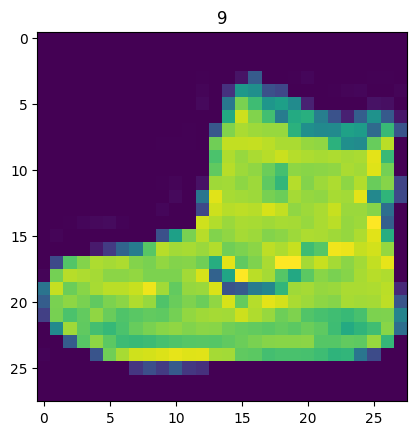

In [ ]:
import matplotlib.pyplot as plt
image, label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

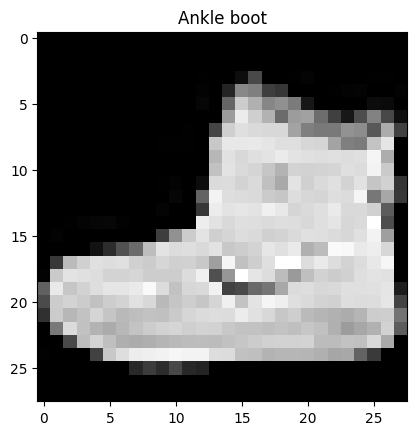

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])


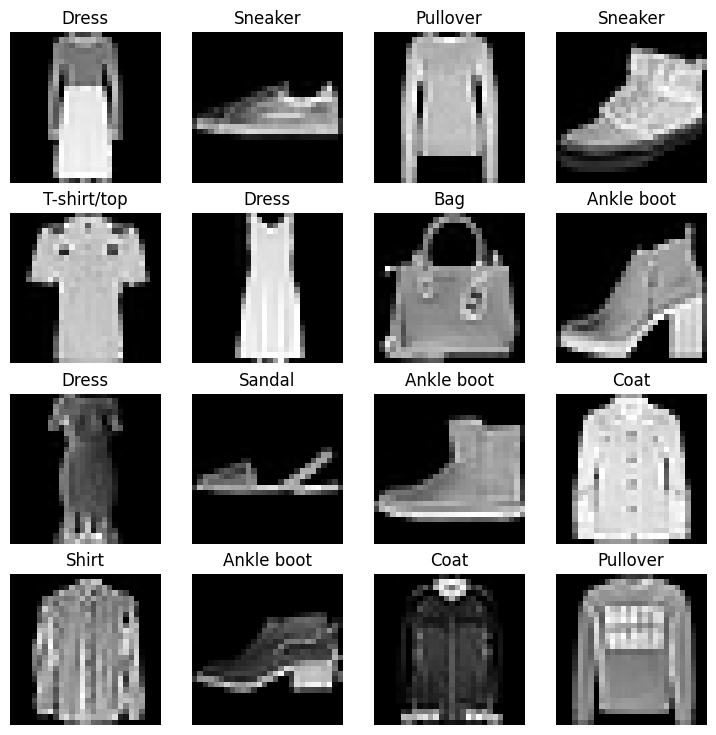

In [ ]:
# plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows *cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

